# Regresión Lineal. Costo de un incidente de seguridad

En este ejercicio se explican los fundamentos de la regresion lineal aplicada a un caso sencillo relacionado con la Cyberseguridad.

#### Enunciado del ejercicio

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al numero de equipos afectados. El conjunto de datos es generado de manera aleatoria.

## 1.- Generacion del DataSet

In [13]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


## 2.- Graficacion

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

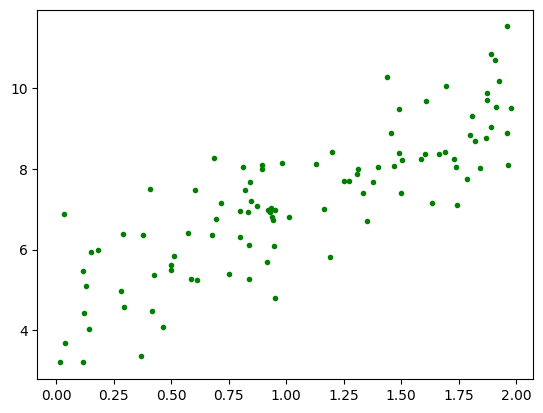

In [15]:
plt.plot(X, y, "g.")
plt.show()

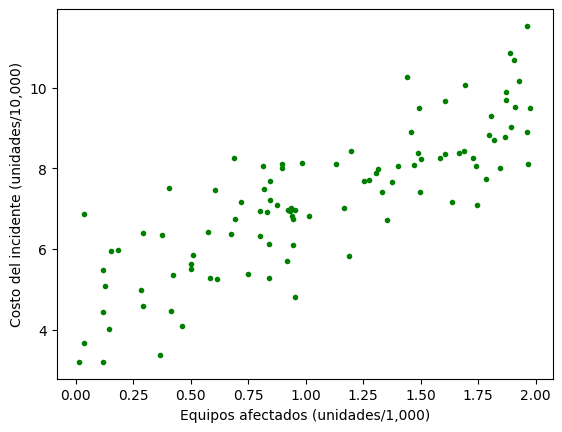

In [16]:
plt.plot(X, y, "g.")
plt.xlabel("Equipos afectados (unidades/1,000)")
plt.ylabel("Costo del incidente (unidades/10,000)")
plt.show()

## 3.- Modificacion del DataSet

In [17]:
import pandas as pd

data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.750687,5.388986
1,1.608267,9.677763
2,0.573981,6.420216
3,0.896909,8.111868
4,0.035630,3.678482
5,0.812774,8.049691
6,0.613709,5.255665
7,1.872644,9.897577
8,0.844318,7.689967
9,1.497846,7.409428


In [18]:
#Escalando el número de Equipos Afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype(int)

#Escalado del Costo
df['Costo'] = df['Costo'] * 1000
df['Costo'] = df['Costo'].astype(int)

df.head(10)


,No_Equipos_Afectados,Costo
0,750,5388
1,1608,9677
2,573,6420
3,896,8111
4,35,3678
5,812,8049
6,613,5255
7,1872,9897
8,844,7689
9,1497,7409


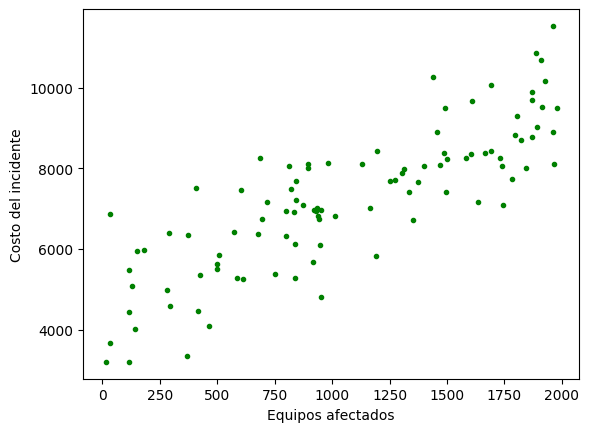

In [19]:
# Representacion grafica del DataSet
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "g.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()

## 4.- Construccion del modelo

In [20]:
from sklearn.linear_model import LinearRegression  

In [21]:
#Construccion del modelo y ajuste de la funcion de hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
# Parametro Theta 0
lin_reg.intercept_

np.float64(4558.8288031720585)

In [23]:
# Parametro Theta 1
lin_reg.coef_

array([2.50286984])

In [24]:
# Prediccion para el valor mínimo y maximo del DataSet de entrenamiento
x_min_max = np.array([[df["No_Equipos_Afectados"].min()], [df['No_Equipos_Afectados'].max()]])
y_train_pred = lin_reg.predict(x_min_max)

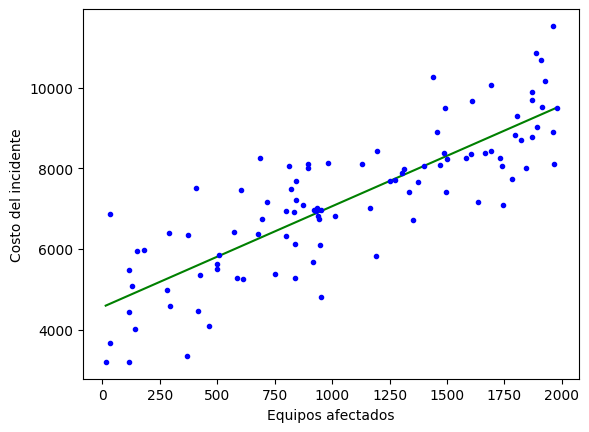

In [26]:
# Representacion grafica de la funcion de hipotesis generada
plt.plot(x_min_max, y_train_pred, "g-")
plt.plot(df["No_Equipos_Afectados"], df["Costo"], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()

## 5.- Prediccion de nuevos ejemplos

In [32]:
x_new = np.array([[1500]]) #1500 equipos afectados

#Prediccion del costo que tendria el incidente
costo = lin_reg.predict(x_new)

print("El costo del incidente seria: \n", int(costo[0]))

El costo del incidente seria: 
 8313


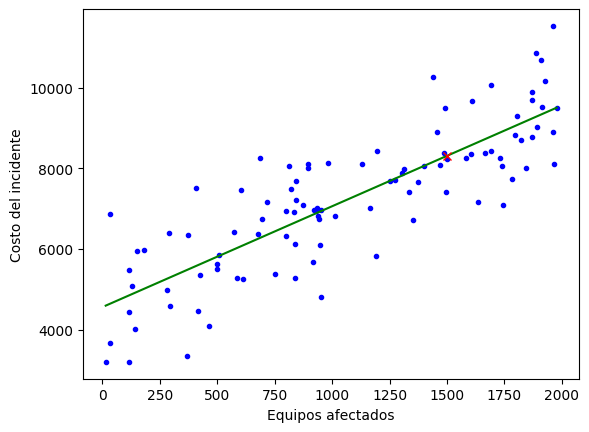

In [33]:
plt.plot(df["No_Equipos_Afectados"], df["Costo"], "b.")
plt.plot(x_min_max, y_train_pred, "g-")
plt.plot(x_new, costo, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()